In [1]:
# import module yang akan dipakai
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# membaca file csv dari data set kita dan menampilkan 5 data teratas
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
# melihat dimensi pada dataset kita
print(f'Dataset kita terdiri dari {df.shape[0]} baris dan {df.shape[1]} kolom.')

Dataset kita terdiri dari 768 baris dan 9 kolom.


In [5]:
# melihat apakah terdapat data yang masih bertipe data objek / non numerik
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
# melihat apakah terdapat missing values pada dataset kita
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [28]:
# membagi data kedalam 2 bagian yaitu X(features) dan y(target)
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
# lakukan split untuk ke X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:
# mencari nilai k yang cocok untuk dataset kita
from sklearn.neighbors import KNeighborsClassifier

# siapkan tempat untuk menampung training akurasi dan test akurasi
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# lakukan perulangan untuk mencari akurasi terbaik dari angka 1 - 9
for i, k in enumerate(neighbors):
    # siapkan model KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit model kita
    knn.fit(X_train, y_train)
    
    # hitung dan tampilkan akurasi pada training set kita
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # hitung dan tampilkan akurasi pada test set kita
    test_accuracy[i] = knn.score(X_test, y_test)

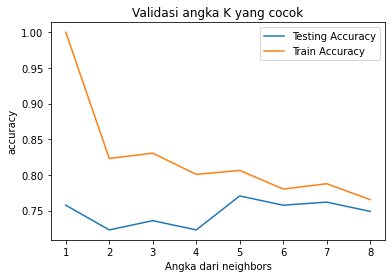

In [13]:
# buat visualisasi accuracy nya
plt.title('Validasi angka K yang cocok')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Train Accuracy')
plt.legend()
plt.xlabel('Angka dari neighbors')
plt.ylabel('accuracy')
plt.show()
# berdasarkan hasil plot dibawah didapat angka 5 yang paling tinggi tingkat akurasinya

In [18]:
# buat model dengan k neighbors nya 5
knn = KNeighborsClassifier(n_neighbors=5)

In [19]:
# lakukan training pada x_train dan y_train 
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
# lihat akurasinya
knn.score(X_test, y_test)

0.7705627705627706